In [1]:
%run iteration_01_0_imports.ipynb

In [2]:
%run iteration_01_0_parameters.ipynb

In [3]:
%run iteration_01_0_utils.ipynb

In [4]:
DATE_TIME = "2021-11-18_20-39-00"

"""
PATH_SAMPLE = "data/sample"
HEALTHY = "H"
SICK = "S"
IMG_SIZE = 400
"""

'\nPATH_SAMPLE = "data/sample"\nHEALTHY = "H"\nSICK = "S"\nIMG_SIZE = 400\n'

# Modele

## make X, y

In [5]:
PATH_DATA_SAMPLE

'../data/sample'

In [6]:
NBR_SAMPLE

2000

In [7]:
DATE_TIME

'2021-11-18_20-39-00'

In [8]:
IMG_SIZE

400

In [9]:
# get list 
list_path_sample_img = []
list_path_sample_img.extend(glob.glob(PATH_DATA_SAMPLE+"/"+DATE_TIME+ "/"+ "*.pkl"))

In [10]:
X = np.zeros((NBR_SAMPLE, IMG_SIZE * IMG_SIZE * 3))

In [11]:
# y = np.chararray(NBR_SAMPLE)
y = np.array([""] * NBR_SAMPLE)

In [12]:
for i, path in tqdm(enumerate(list_path_sample_img)):
    
    X[i] = pickel_read(path).ravel()
    
    _, file_name, _ = split_file_info(path)
    y[i] = file_name[0]

2000it [02:33, 13.00it/s]


## Random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier(random_state = 0)

In [15]:
# lire les pkl 
# recuperer le S et H (labels)

In [16]:
# decouper train / validation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0) 

In [19]:
from datetime import datetime 

In [20]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

def evaluate(model, X_train, X_test, y_train, y_test, cv = 5):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, cbar = False,
                     xticklabels=np.unique(y_train), 
                     yticklabels=np.unique(y_train),
                     fmt='5d') # cells are counts
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Réel');
    print(classification_report(y_test, y_pred))
    print("on y est")

    """
    # ===
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = cv, 
                                               train_sizes =np.linspace(0.1, 1, 10),
                                                scoring = 'f1_micro'
                                          )
    plt.figure(figsize=(12,8))
    axes = plt.gca()
    axes.set_ylim([0.5,1.05])
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation_score')
    plt.legend()
    plt.show()
    # ---
    """

2021-11-21 12:01:48.677533
              precision    recall  f1-score   support

           H       0.71      0.65      0.68       200
           S       0.68      0.74      0.71       200

    accuracy                           0.69       400
   macro avg       0.70      0.70      0.69       400
weighted avg       0.70      0.69      0.69       400

on y est
2021-11-21 12:02:27.499589


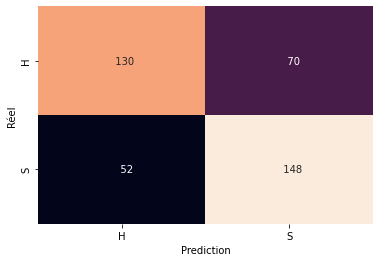

In [21]:
print(datetime.now())
evaluate(clf, X_train, X_test, y_train, y_test)
print(datetime.now())

In [23]:
# Sauvegarder le modèle
create_dir_hierarchy(PATH_MODEL)
pickel_save(clf, PATH_MODEL + "/" + "model_rf.pkl")

In [26]:
np.shape(X_train)

(1600, 480000)